# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [129]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/Victor/Documents/Udacity-Selfdriving/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p"
testing_file = "/Users/Victor/Documents/Udacity-Selfdriving/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [130]:
import numpy as np
print(np.shape(X_train))
print(np.shape(X_test))

(39209, 32, 32, 3)
(12630, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [131]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

2


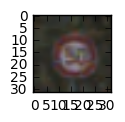

In [305]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

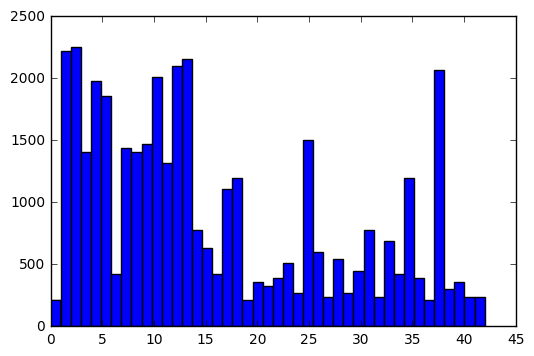

In [133]:
plt.hist(y_train,bins=43)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [134]:
# Shuffle training set
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=50)

In [135]:
# Normalize image data
def normalize(image_data):
    a = 0.01
    b = 0.99
    color_min = 0.0
    color_max = 255.0

    return a + ( ( (image_data - color_min) * (b - a) )/(color_max - color_min))

X_train = normalize(X_train)
X_test = normalize(X_test)

In [136]:
# Split image data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2,
                                                  random_state=50)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

First, the training set is shuffled to prevent the order of the images from leaking information about its class. For example, the original data may have been ordered according to its class, so if an image is predicted to be in class 6, the probability that the following image is in class 6 is also very high. Without shuffling, this will cause the training accuracy to be very high and the model will not translate well to the test set. In addition, the validation set may not contain images of all the classes if shuffling is not applied in the first place (unless splitting into validation set is random), making it hard to achieve high accuracy in the validation set and subsequently the test set. While many datasets are probably not ordered according to class, shuffling is a precaution taken to prevent the order from causing problems in the future when creating the model.

Next, the training and test sets were normalized so that values were all in a similar range. Otherwise, some images may be a lot brighter than others (ie. significant differences in the values) , making it difficult to use shared weights when implementing the model. Since the weights are multiplied to the image values before the bias is added, the calculated gradients during the training phase may fluctuate uncontrollably. To make the process more efficient, the training and test sets are normalized. Following that, the original training set is randomly split into training and validation sets to improve the accuracy of the model.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The training set is 80% of the original training set after shuffling it, while the validation set is the remaining 20%. The validation set is used to tune the parameters to prevent overfitting. The test set remains the same.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Answer:**

The model consists of:
1. Convolutional Layer of 32 filters of 3x3, with ReLu Activation
2. Max Pooling of 2x2
3. Fully Connected Layer with 512 neurons
4. Fully Connected Layer with 128 neurons
5. Output Layer of 43 classes

In [137]:
# BASIC SUMMARY

# number of training examples
n_train = X_train.shape[0]

# number of valid examples
n_valid = X_val.shape[0]

# number of testing examples
n_test = X_test.shape[0]

# what's the shape of an image?
image_shape = X_train[0].shape

# how many classes are in the dataset
n_classes = len(set(y_train))

print("n_train:", n_train)
print("n_valid:", n_valid)
print("n_test:", n_test)
print("image shape:", image_shape)
print("n_classes:", n_classes)

n_train: 31367
n_valid: 7842
n_test: 12630
image shape: (32, 32, 3)
n_classes: 43


In [346]:
# CREATE PLACEHOLDERS

import tensorflow as tf
x = tf.placeholder("float", [None, 32, 32, 3])
tf.add_to_collection("x", x)  # Remember this Op.

y = tf.placeholder("int32", [None])
y_one_hot = tf.one_hot(y,depth=n_classes)
tf.add_to_collection("y_one_hot", y_one_hot) 


keep_prob = tf.placeholder(tf.float32)
tf.add_to_collection("keep_prob", keep_prob) 


In [347]:
# NETWORK PARAMETERS

# Input
n_input = 32 * 32 * 3
input_shape = (32, 32, 3)
input_channels = 3

# Filters
n_filters = 32
kernel_size = (3, 3)

# Max Pooling
pool_size = 2 # ie. (2,2)

# Fully Connected Layers
n_fc1 = 512
n_fc2 = 128
dropout = 0.9

# Weights/Biases Initialization
stddev_W = 0.1
mean_W = 0.0
mean_B = 0.0

padding = 'VALID'
if padding == 'SAME':
    conv_output_length = 6
elif padding == 'VALID':
    conv_output_length = 5
else:
    raiseException("Unknown padding.")

In [348]:
# CONVOLUTIONAL NET MODEL

def ConvNet(x):    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 11x11x32.
    filter_1_W = tf.Variable(tf.truncated_normal(shape=[kernel_size[0], kernel_size[1], input_channels, n_filters],mean = mean_W, stddev = stddev_W))
    filter_1_B = tf.Variable(tf.zeros(n_filters))
    conv_layer_1 = tf.nn.conv2d(x, filter_1_W,strides=[1,3,3,1],padding='VALID')
    conv_layer_1 = tf.nn.bias_add(conv_layer_1,filter_1_B)
    # Activation.
    conv_layer_1 = tf.nn.relu(conv_layer_1)
    # Pooling. Input = 11x11x32. Output = 6x6x32.
    ksize = [1,pool_size,pool_size,1]
    strides = [1,pool_size,pool_size,1]
    padding = 'VALID'
    pool_layer_1 = tf.nn.max_pool(conv_layer_1, ksize, strides, padding)
    # Convolutional layers have inbuilt resistance to overfitting; don't need to apply dropout
    # FC1: Input = 6x6x32. Output = 512.
    pool_layer_1_shape = pool_layer_1.get_shape().as_list()
    fc1 = tf.reshape(pool_layer_1, [-1, pool_layer_1_shape[1]*pool_layer_1_shape[2]*pool_layer_1_shape[3]])
    fc1_W = tf.Variable(tf.truncated_normal(shape=[n_filters * conv_output_length**2, n_fc1],mean = mean_W, stddev = stddev_W))
    fc1_B = tf.Variable(tf.zeros(n_fc1))
    fc1 = tf.add(tf.matmul(fc1, fc1_W), fc1_B)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # FC2: Input = 512. Output = 128.
    fc2_W = tf.Variable(tf.truncated_normal(shape=[n_fc1, n_fc2],mean = mean_W, stddev = stddev_W))
    fc2_B = tf.Variable(tf.zeros(n_fc2))
    fc2 = tf.add(tf.matmul(fc1, fc2_W), fc2_B)
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Output layer: Output = 43.
    output_W = tf.Variable(tf.truncated_normal(shape=[n_fc2, n_classes],mean = mean_W, stddev = stddev_W))
    output_B = tf.Variable(tf.constant(biases_mean,shape=[n_classes]))
    output = tf.add(tf.matmul(fc2,output_W),output_B)


    return output

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**

The following parameters were selected to train the model:

Optimizer: AdamOptimizer
Batch Size: 100
Epochs: 20
Learning Rate: 0.001
Padding: VALID

In [349]:
# Training parameters
learning_rate = 0.001
EPOCHS = 3
BATCH_SIZE = 100
n_train = len(X_train)

# Construct model, predict probabilities
pred = ConvNet(x)
tf.add_to_collection("pred", pred)

pred_probs = tf.nn.softmax(pred)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y_one_hot))
tf.add_to_collection('cost', cost)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(cost)
                                       
# Function to initialise the variables
init = tf.global_variables_initializer()

In [350]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.add_to_collection('accuracy_operation', accuracy_operation)


saver = tf.train.Saver()
best_accuracy = 0

def evaluate(X_data, y_data, dropout = 1.0):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [351]:
#from tqdm import tqdm

with tf.Session() as sess:
    sess.run(init)
    
    print("Training...")
    print()
    for epoch_i in range(EPOCHS):
        
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        validation_accuracy = evaluate(X_val, y_val)
        
        #save model with best validation accuracy
        if validation_accuracy > best_accuracy:                
                saver.save(sess, './checkpoints/convnet.ckpt', global_step=offset)
                best_accuracy = validation_accuracy
                
        print("EPOCH {} ...".format(epoch_i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Accuracy of Saved Model = {:.3f}".format(best_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.631

EPOCH 2 ...
Validation Accuracy = 0.777

EPOCH 3 ...
Validation Accuracy = 0.851

Test Accuracy = 0.729
Accuracy of Saved Model = 0.851


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [144]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
# Helper function to read image copied from lane lines project
def read_image_and_print_dims(image_path):
    """Reads and returns image.
    Helper function to examine how an image is represented.
    """
    #reading in an image
    image = mpimg.imread(image_path)
    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimensions:', image.shape)
    plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image
    return image

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [316]:
def predict(img):
    """Print model's prediction of which traffic sign this image is."""
    classification = sess.run(pred_probs, feed_dict={x: [img], keep_prob: 1.0})
    print(classification)
    print('NN predicted', classification[0])

This image is: <class 'numpy.ndarray'> with dimensions: (123, 126, 3)


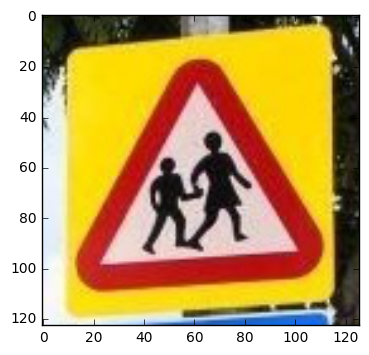

In [180]:
img = read_image_and_print_dims("/Users/Victor/Downloads/schoolzone.jpg")

In [181]:
import PIL
from PIL import Image

width = 32
height = 32
img = Image.open("/Users/Victor/Downloads/schoolzone.jpg")
img = img.resize((width,height), PIL.Image.ANTIALIAS)
img.save('/Users/Victor/Downloads/schoolzone_resized.jpg') 

This image is: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


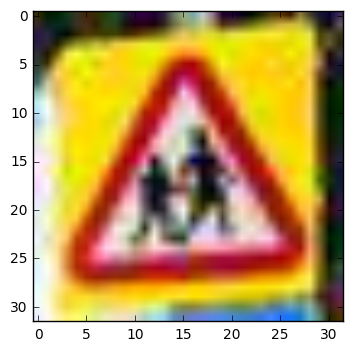

In [355]:
img = read_image_and_print_dims("/Users/Victor/Downloads/schoolzone_resized.jpg")

In [365]:
def print_result(ground_truth, top_k_prob, top_k_indices):
    class_names = pd.read_csv('./data/signnames.csv')['SignName'].values
    index = 0
    img_index = 0
    plt.figure(figsize=(14, 11))
    gs = gridspec.GridSpec(5, 2, width_ratios=[1, 0.45]) 
    for key in ground_truth:
        img, tag = resized_image_data[img_index]
        img_index += 1
        plt.subplot(gs[index])
        plt.imshow(img)
        plt.axis('off')
        plt.title(tag)
        index += 1

        plt.subplot(gs[index])
        plt.barh(np.arange(1, 6, 1), 
                 top_k_prob[key, :],
                 0.8, 
                 color='#dd1c77')
        plt.yticks(np.arange(1, 6, 1), class_names[top_k_indices[key, :]])
        index += 1
    plt.suptitle('Test Images and their Softmax Probabilities')
    plt.show()
    

In [381]:
img = tf.reshape(img,(1,32,32,3))



with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./checkpoints/convnet.ckpt-31300.meta')
    saver.restore(sess,  tf.train.latest_checkpoint('./checkpoints'))
    logits = tf.get_collection('pred')[0]
    softmax = tf.nn.softmax(logits)
    softmax_val = sess.run(softmax,feed_dict={x:[img]})
    print(softmax_val)

TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32) is not an element of this graph.

In [372]:
with tf.Session(graph = tf.Graph()) as sess:
    saver = tf.train.import_meta_graph('./checkpoints/convnet.ckpt-31300.meta')
    saver.restore(sess,  tf.train.latest_checkpoint('./checkpoints'))

    x = tf.get_collection("x")[0]
    keep_prob = tf.get_collection("keep_prob")[0]
    logits = tf.get_collection('pred')[0]
    softmax = tf.nn.softmax(logits)
    
    img = tf.reshape(img, (1,32,32,3))

    normalized_prob = sess.run(softmax, feed_dict={x: X_train[0:10], keep_prob: 1.0})    
    top_k_op = tf.nn.top_k(normalized_prob, k=5)
    top_k_results = sess.run(top_k_op)
    
    # show predictions with their probabilities


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_3' with dtype float
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_3', defined at:
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-372-06cd0c7932dc>", line 2, in <module>
    saver = tf.train.import_meta_graph('./checkpoints/convnet.ckpt-31300.meta')
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1526, in import_meta_graph
    **kwargs)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/meta_graph.py", line 502, in import_scoped_meta_graph
    producer_op_list=producer_op_list)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/importer.py", line 285, in import_graph_def
    op_def=op_def)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/Victor/anaconda/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_3' with dtype float
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.